In [31]:
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error

In [3]:
iris_ld = load_iris()
iris = pd.DataFrame(data=iris_ld.data, columns=iris_ld.feature_names)
iris['target'] = iris_ld.target

#iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
#                   header=None,
#                   names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

In [4]:
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
mlp = MLPClassifier(hidden_layer_sizes=(9,), max_iter=1000, random_state=42)

In [6]:
mlp.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(9,), max_iter=1000, random_state=42)

In [7]:
y_pred = mlp.predict(X_test)

In [8]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9666666666666667


In [15]:
air_df = pd.read_csv("Airplane.csv")
air_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [16]:
air_df['satisfaction'] = air_df['satisfaction'].map({"neutral or dissatisfied": 0, "satisfied": 1})

In [17]:
def spectrum_to_descrete_mapper(value: int, _range, chunk_number: int = 10):
  """
  calculates the location of the  in the range <_range>
  and returns a number between 0 and chunk_number -1
  """
  percent = value / _range * chunk_number
  return math.floor(percent)

In [18]:
max_flight_distance = max(air_df["Flight Distance"])
min_flight_distance = min(air_df["Flight Distance"])
flight_distance_range = max_flight_distance - min_flight_distance
air_df["Flight Distance"] = air_df['Flight Distance'].map(lambda value: spectrum_to_descrete_mapper(value, flight_distance_range, 10))

In [19]:
air_df["Customer Type"] = air_df["Customer Type"].map({"Loyal Customer": 1, "disloyal Customer": 0})
air_df["Gender"] = air_df["Gender"].map({"Male": 1, "Female": 0})

In [20]:
max_age = max(air_df['Age'])
min_age = min(air_df['Age'])
age_range = max_age - min_age
air_df["Age"] = air_df["Age"].map(lambda value: spectrum_to_descrete_mapper(value, age_range, 10))

In [21]:
air_df["Type of Travel"] = air_df["Type of Travel"].map({"Personal Travel": 1, "Business travel": 0})

In [22]:
air_df["Class"] = air_df["Class"].map({"Eco Plus": 0, "Business": 1, "Eco": 2})

In [23]:
max_delay = max(air_df['Departure Delay in Minutes'])
min_delay = min(air_df['Departure Delay in Minutes'])
delay_range = max_delay - min_delay
air_df["Departure Delay in Minutes"] = air_df["Departure Delay in Minutes"]\
.map(lambda value: spectrum_to_descrete_mapper(value, delay_range, 5))

In [24]:
arrival_delay_in_minutes_mean = air_df["Arrival Delay in Minutes"].mean()
air_df["Arrival Delay in Minutes"] = air_df["Arrival Delay in Minutes"]\
.map(lambda value: value if value > 0 else arrival_delay_in_minutes_mean)

In [25]:
max_delay = max(air_df['Arrival Delay in Minutes'])
min_delay = min(air_df['Arrival Delay in Minutes'])
delay_range = max_delay - min_delay
air_df["Arrival Delay in Minutes"] = air_df["Arrival Delay in Minutes"]\
.map(lambda value: spectrum_to_descrete_mapper(value, delay_range, 5))

In [26]:
X = air_df.iloc[:, :-1].values
y = air_df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [192]:
mlp = MLPClassifier(hidden_layer_sizes=(20, 20, 20, 5), random_state=42)

In [193]:
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(20, 20, 20, 5), random_state=42)

In [194]:
y_pred = mlp.predict(X_test)

In [195]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8337904816900052


In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(20, 20, 20, 50), random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.829315239882585


In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(1000, 1000, 1000, 1000), random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5636398633367018


In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(20, 20, 20, 20, 20, 20, 20, 10), random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8280159761320437


In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(50, 50,50,50,50,50, 10), random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5636398633367018


In [ ]:

mx = 0
mx_l = None
for i in range(5, 30):
    for j in range(5, 15):
        hl = (i, i, i, j)
        mlp = MLPClassifier(hidden_layer_sizes=hl, random_state=42)
        mlp.fit(X_train, y_train)
        y_pred = mlp.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"i: {i}")
        print(f"j: {j}")
        print("----------")
        if accuracy>mx:
            print(accuracy)
            mx = accuracy
            mx_l = hl

i: 5
j: 5
----------
0.5636398633367018
i: 5
j: 6
----------
i: 5
j: 7
----------
i: 5
j: 8
----------
i: 5
j: 9
----------
i: 5
j: 10
----------
i: 5
j: 11
----------
i: 5
j: 12
----------
i: 5
j: 13
----------
i: 5
j: 14
----------
i: 6
j: 5
----------
i: 6
j: 6
----------
i: 6
j: 7
----------
i: 6
j: 8
----------
i: 6
j: 9
----------
i: 6
j: 10
----------
i: 6
j: 11
----------
i: 6
j: 12
----------
i: 6
j: 13
----------
i: 6
j: 14
----------
i: 7
j: 5
----------
i: 7
j: 6
----------
0.7699821952745296
i: 7
j: 7
----------
i: 7
j: 8
----------
i: 7
j: 9
----------
i: 7
j: 10
----------
i: 7
j: 11
----------
i: 7
j: 12
----------
i: 7
j: 13
----------
i: 7
j: 14
----------
i: 8
j: 5
----------
i: 8
j: 6
----------
i: 8
j: 7
----------
i: 8
j: 8
----------
0.8465425147971705
i: 8
j: 9
----------


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


i: 8
j: 10
----------
0.8651652952215967
i: 8
j: 11
----------
i: 8
j: 12
----------
i: 8
j: 13
----------
i: 8
j: 14
----------
i: 9
j: 5
----------


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


i: 9
j: 6
----------
0.866464558972138
i: 9
j: 7
----------
i: 9
j: 8
----------
i: 9
j: 9
----------
0.8665126798517877
i: 9
j: 10
----------
i: 9
j: 11
----------
i: 9
j: 12
----------
i: 9
j: 13
----------
i: 9
j: 14
----------
i: 10
j: 5
----------
i: 10
j: 6
----------
i: 10
j: 7
----------
i: 10
j: 8
----------
i: 10
j: 9
----------
i: 10
j: 10
----------
i: 10
j: 11
----------
i: 10
j: 12
----------
0.8696886579086666
i: 10
j: 13
----------
i: 10
j: 14
----------
i: 11
j: 5
----------
i: 11
j: 6
----------
i: 11
j: 7
----------
i: 11
j: 8
----------
i: 11
j: 9
----------
i: 11
j: 10
----------
i: 11
j: 11
----------
i: 11
j: 12
----------
i: 11
j: 13
----------
i: 11
j: 14
----------
i: 12
j: 5
----------
i: 12
j: 6
----------
i: 12
j: 7
----------
i: 12
j: 8
----------
i: 12
j: 9
----------
i: 12
j: 10
----------
i: 12
j: 11
----------


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


i: 12
j: 12
----------
i: 12
j: 13
----------
i: 12
j: 14
----------
i: 13
j: 5
----------
i: 13
j: 6
----------
i: 13
j: 7
----------
i: 13
j: 8
----------
i: 13
j: 9
----------
i: 13
j: 10
----------
i: 13
j: 11
----------
i: 13
j: 12
----------
i: 13
j: 13
----------
i: 13
j: 14
----------
i: 14
j: 5
----------
i: 14
j: 6
----------
i: 14
j: 7
----------
i: 14
j: 8
----------
i: 14
j: 9
----------
i: 14
j: 10
----------
i: 14
j: 11
----------
i: 14
j: 12
----------
i: 14
j: 13
----------
i: 14
j: 14
----------
i: 15
j: 5
----------
i: 15
j: 6
----------
i: 15
j: 7
----------
i: 15
j: 8
----------
i: 15
j: 9
----------
i: 15
j: 10
----------
i: 15
j: 11
----------
i: 15
j: 12
----------
i: 15
j: 13
----------
i: 15
j: 14
----------
i: 16
j: 5
----------
i: 16
j: 6
----------
i: 16
j: 7
----------
i: 16
j: 8
----------
i: 16
j: 9
----------
i: 16
j: 10
----------
i: 16
j: 11
----------
i: 16
j: 12
----------
i: 16
j: 13
----------
i: 16
j: 14
----------
i: 17
j: 5
----------
0.8721909

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


i: 20
j: 11
----------
i: 20
j: 12
----------
i: 20
j: 13
----------
i: 20
j: 14
----------
i: 21
j: 5
----------
i: 21
j: 6
----------
i: 21
j: 7
----------
i: 21
j: 8
----------
i: 21
j: 9
----------


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


i: 21
j: 10
----------
0.8728165150858957
i: 21
j: 11
----------
i: 21
j: 12
----------
i: 21
j: 13
----------
i: 21
j: 14
----------
i: 22
j: 5
----------
i: 22
j: 6
----------
i: 22
j: 7
----------
i: 22
j: 8
----------
i: 22
j: 9
----------
i: 22
j: 10
----------
i: 22
j: 11
----------
i: 22
j: 12
----------
i: 22
j: 13
----------
i: 22
j: 14
----------
i: 23
j: 5
----------
i: 23
j: 6
----------
i: 23
j: 7
----------
i: 23
j: 8
----------
i: 23
j: 9
----------
i: 23
j: 10
----------
i: 23
j: 11
----------
i: 23
j: 12
----------
i: 23
j: 13
----------
i: 23
j: 14
----------
i: 24
j: 5
----------
i: 24
j: 6
----------
i: 24
j: 7
----------
i: 24
j: 8
----------
i: 24
j: 9
----------
i: 24
j: 10
----------
i: 24
j: 11
----------
i: 24
j: 12
----------
i: 24
j: 13
----------
i: 24
j: 14
----------
i: 25
j: 5
----------
i: 25
j: 6
----------
i: 25
j: 7
----------
i: 25
j: 8
----------
i: 25
j: 9
----------
i: 25
j: 10
----------
i: 25
j: 11
----------
i: 25
j: 12
----------
i: 25
j: 13


In [27]:
mlp = MLPClassifier(hidden_layer_sizes=(17, 17, 17, 5), random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8721909436504499


In [197]:
mx = 0
mx_l = None
for i in range(4, 9):
  hl = (i ** 2, (i-1)**2, (i-2)**2)
  mlp = MLPClassifier(hidden_layer_sizes=hl, random_state=42)
  mlp.fit(X_train, y_train)
  y_pred = mlp.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"i: {i}")
  if accuracy>mx:
    print(accuracy)
    mx = accuracy
    mx_l = hl

  print("----------")

i: 4
0.5636398633367018
----------
i: 5
0.772484481016313
----------
i: 6
----------
i: 7
----------
i: 8
----------


In [203]:
mx = 0
mx_l = None
for i in range(2, 7):
  hl = (i ** 2, (i+1)**2, (i+2)**2)
  mlp = MLPClassifier(hidden_layer_sizes=hl, random_state=42)
  mlp.fit(X_train, y_train)
  y_pred = mlp.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"i: {i}")
  if accuracy>mx:
    print(accuracy)
    mx = accuracy
    mx_l = hl

  print("----------")

i: 2
0.5636398633367018
----------
i: 3
0.6573312160146287
----------
i: 4
0.7841778547711852
----------
i: 5
----------
i: 6
----------


In [201]:
mlp = MLPClassifier(hidden_layer_sizes=(16, 25, 36,), random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7841778547711852


In [202]:
mlp = MLPClassifier(hidden_layer_sizes=(36, 25, 16,), random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.5651316106058418


In [32]:
def predict_function2(X, y, hidden_layer_sizes, max_iter, random_state=42, test_size=0.5, noise=None):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

  mlp = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter, random_state=random_state)

  mlp.fit(X_train, y_train)

  if noise is not None:
    y_pred = mlp.predict(X + noise)
  else:
    y_pred = mlp.predict(X)

  mse = mean_squared_error(y, y_pred)
  print(f'Mean Squared Error: {mse}')

  fig, ax = plt.subplots()

  ax.plot(X, y, 'b', label='Actual', marker=".", linestyle="None")

  ax.plot(X, y_pred, 'r', label='Predicted', marker=".", linestyle="None")

  ax.plot(X_test, y_test, "g", label="Test data", marker=".", linestyle="None")

  ax.set_xlabel('Input')
  ax.set_ylabel('Output')
  ax.set_title('MLP Regression on Sine Function')

  ax.legend()

  plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 0.0004265330461221431


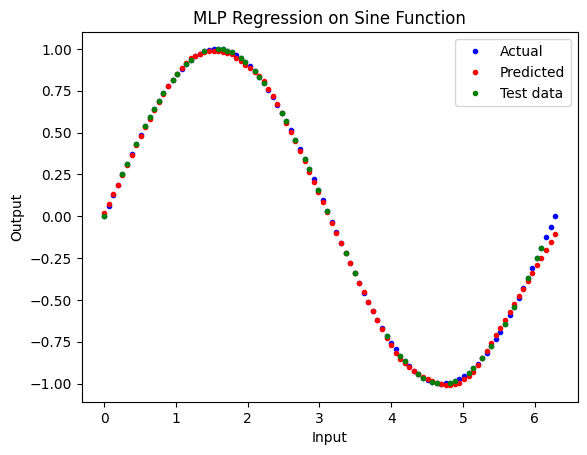

In [34]:
X = np.linspace(0, 2*np.pi, 100).reshape(-1, 1)
y = np.sin(X)

predict_function2(X, y, (100, 81, 64, 49), 100000)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 0.0037720740256937902


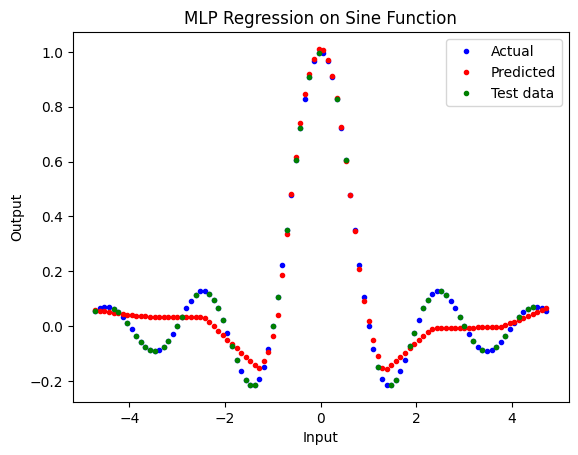

In [36]:
X = np.linspace(-3/2*np.pi, 3/2*np.pi, 100).reshape(-1, 1)
y = np.sinc(X)

predict_function2(X, y, (100, 81, 64, 49, 36, 25, 16), 100000)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 5.283697664533879e-05


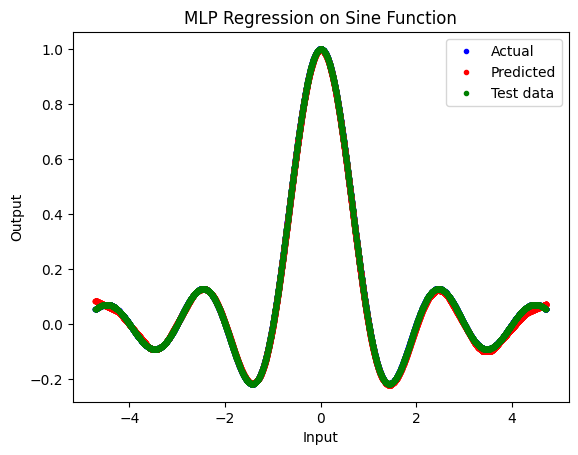

In [37]:
X = np.linspace(-3/2*np.pi, 3/2*np.pi, 10000).reshape(-1, 1)
y = np.sinc(X)

predict_function2(X, y, (1024, 512, 256, 128,), 100000)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 0.002599393176453735


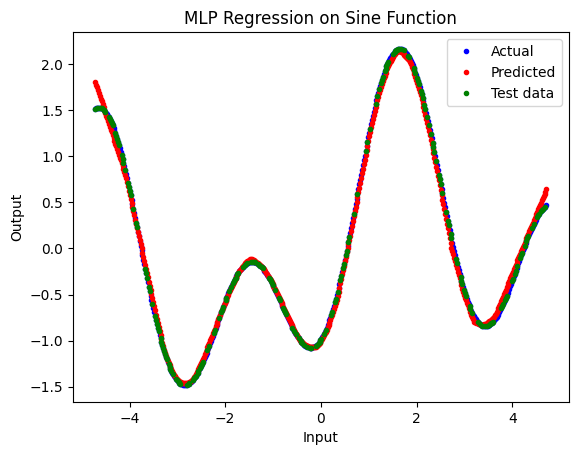

In [38]:
X = np.linspace(-3/2*np.pi, 3/2*np.pi, 500).reshape(-1, 1)
y = np.sin(X) + np.cos(2*X+3) + X/np.pi ** 2

predict_function2(X, y, (100, 81, 64, 49, 36, 25, 16), 100000)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean Squared Error: 124.29235521977017


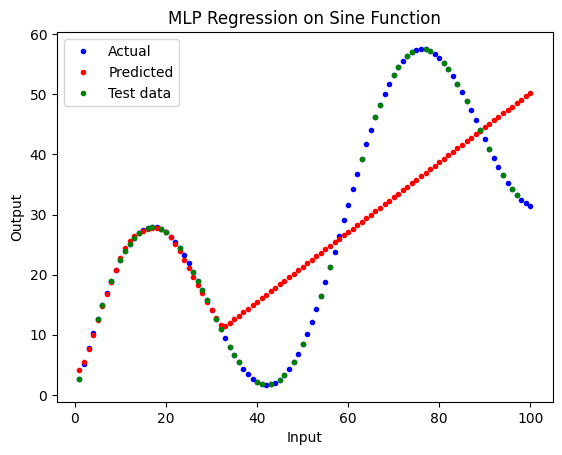

In [39]:
X = np.linspace(1, 100, 100).reshape(-1, 1)
y = X / 2 + 20 * np.sin(X / (np.pi * 3))

predict_function2(X, y, (1024, 512, 256, 128), 200)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 0.05680055978996362


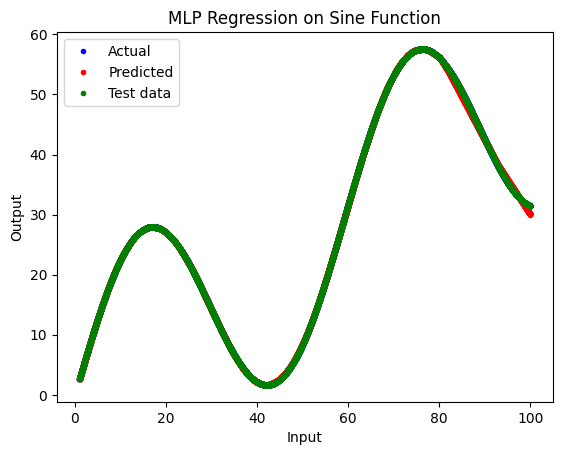

In [40]:
X = np.linspace(1, 100, 10000).reshape(-1, 1)
y = X / 2 + 20 * np.sin(X / (np.pi * 3))

predict_function2(X, y, (1024, 512, 256, 128), 200)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 0.4939977446420133


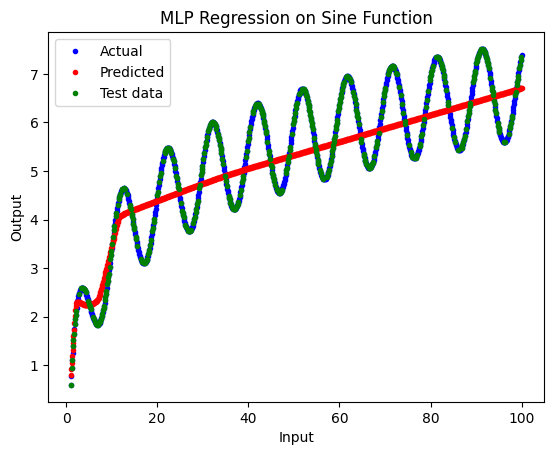

In [41]:
X = np.linspace(1, 100, 1000).reshape(-1, 1)
y = np.log2(X) + np.sin(2*X / np.pi)

predict_function2(X, y, (1024, 512, 256, 128), 200)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean Squared Error: 0.05136234142316466


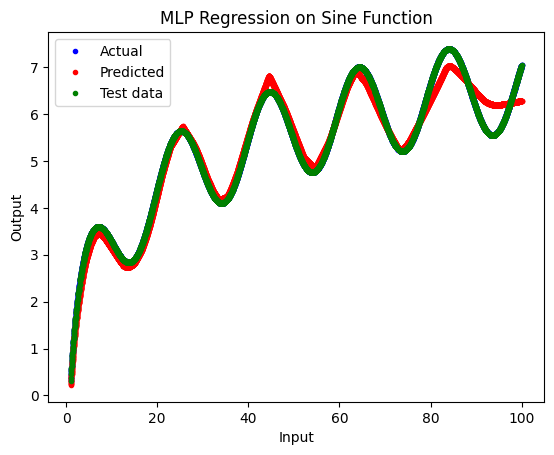

In [42]:
X = np.linspace(1, 100, 10000).reshape(-1, 1)
y = np.log2(X) + np.sin(X / np.pi)

predict_function2(X, y, (1024, 512, 256, 128), 200)

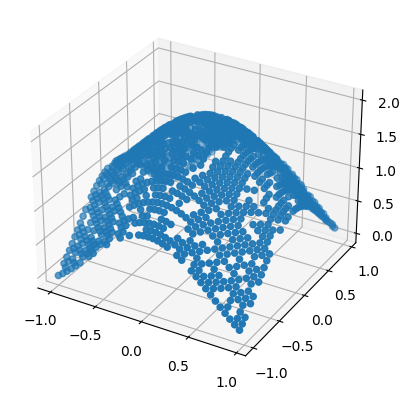

0.0003713182157998867


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neural_network import MLPRegressor


def z(x,y):
    # return np.exp(-(np.square(x) + np.square(y))/0.1)
    return np.sinc(x) + np.sinc(y)


x = np.arange(-1,1,0.05)
xy = [(j,k) for j in x for k in x]
out = [z(p[0],p[1]) for p in xy]

x_train, x_test, y_train, y_test = train_test_split(xy, out)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')


x1_vals = np.array([p[0] for p in x_train])
x2_vals = np.array([p[1] for p in x_train])


x1_valz = np.array([p[0] for p in x_test])
x2_valz = np.array([p[1] for p in x_test])


ax.scatter(x1_vals, x2_vals, y_train)
plt.show()

mlp = MLPRegressor(
    hidden_layer_sizes=[20],
    max_iter=3000, #2000 best 3000 second
    tol=0,
)

# train network
mlp.fit(x_train,y_train)

# test
predictions = mlp.predict(x_test)
mse = mean_squared_error(y_test, predictions)
print(mse)
ax.scatter(x1_valz, x2_valz, predictions, c='red')

plt.show()

In [ ]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Generate input data between 0 and 2pi
X = np.linspace(0, 2*np.pi, 100).reshape(-1, 1)

# Generate target data from the sine function
y = np.sin(X)

# Create an instance of the MLPRegressor class and set the desired hyperparameters
# mlp = MLPRegressor(hidden_layer_sizes=(1000,), max_iter=1000, random_state=42)
mlp = MLPRegressor(hidden_layer_sizes=(50, 50, 50, 50,), max_iter=100000, random_state=42)

# Train the MLP on the data
mlp.fit(X, y)

# Use the trained MLP to make predictions on the data
y_pred = mlp.predict(X)

# Calculate the mean squared error between the predicted and actual values
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse}')


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 0.0017684272115245836


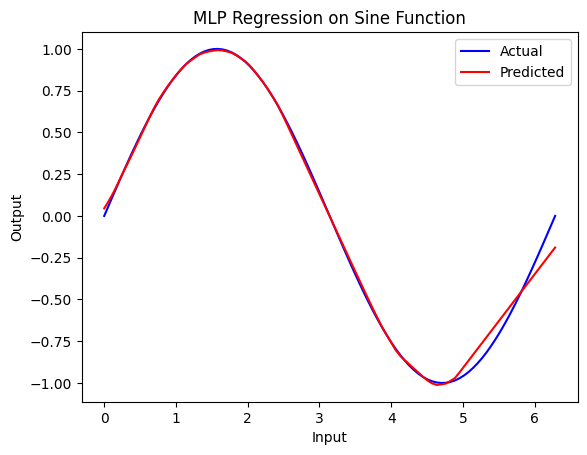

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the actual values in blue
ax.plot(X, y, 'b', label='Actual')

# Plot the predicted values in red
ax.plot(X, y_pred, 'r', label='Predicted')

# Add axis labels and a title
ax.set_xlabel('Input')
ax.set_ylabel('Output')
ax.set_title('MLP Regression on Sine Function')

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 0.015253286865539643


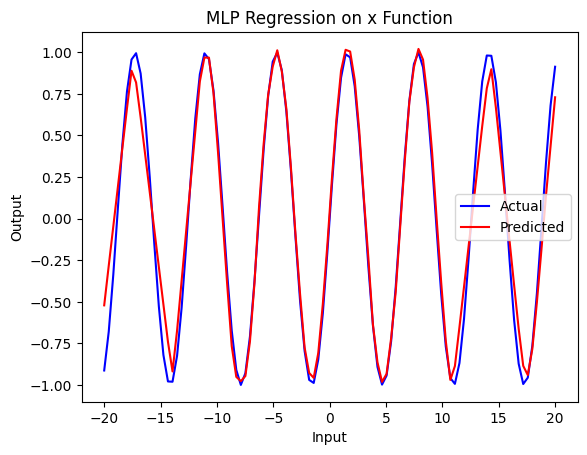

In [ ]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Generate input data between -10 and 10
X = np.linspace(-20, 20, 100).reshape(-1, 1)

y = np.sin(X)

# Create an instance of the MLPRegressor class and set the desired hyperparameters
#mlp = MLPRegressor(hidden_layer_sizes=(100,100), max_iter=5000, random_state=42, activation='relu')
mlp = MLPRegressor(hidden_layer_sizes=(50, 50, 50, 50, 50, 50, 100), max_iter=100000, random_state=42)


# Train the MLP on the data
mlp.fit(X, y)

# Use the trained MLP to make predictions on the data
y_pred = mlp.predict(np.linspace(-20, 20, 100).reshape(-1, 1))

# Calculate the mean squared error between the predicted and actual values
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse}')

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the actual values in blue
ax.plot(X, y, 'b', label='Actual')

# Plot the predicted values in red
ax.plot(np.linspace(-20, 20, 100).reshape(-1, 1), y_pred, 'r', label='Predicted')

# Add axis labels and a title
ax.set_xlabel('Input')
ax.set_ylabel('Output')
ax.set_title('MLP Regression on x Function')

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 0.3359631817524978


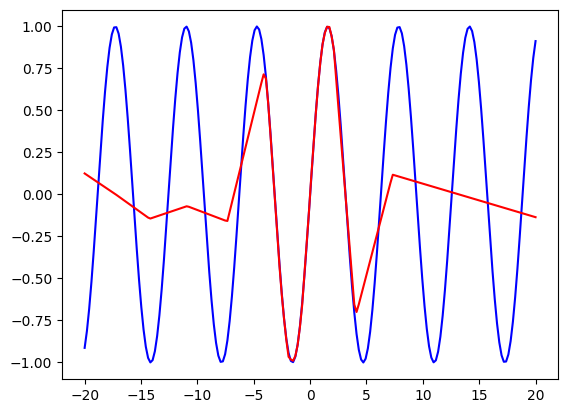

In [ ]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X = np.linspace(-100, 100, 200) / 5
Y = np.sin(X)

X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

mlp = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=5000, activation='relu')

mlp.fit(X, Y)

Y_pred = mlp.predict(X)

mse = mean_squared_error(Y, Y_pred)
print(f'Mean Squared Error: {mse}')

fig, axis = plt.subplots()

axis.plot(X, Y, 'b', label='Actual')
axis.plot(X, Y_pred, 'r', label='Pred')

plt.show()


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


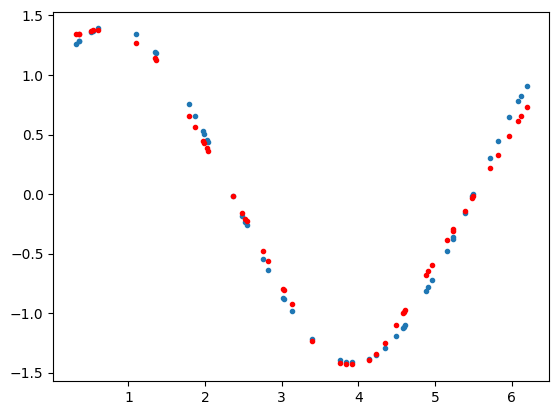

In [ ]:
# sin(x) + cos(x)

import random
import numpy as np
import matplotlib.pyplot as plt

X = []
Y = []
N = 50

for i in range(N):
    X.append(np.random.rand() * 2 * np.pi)
    Y.append(np.sin(X[i]) + np.cos(X[i]))

X = np.array(X).reshape(-1, 1)
Y = np.array(Y).reshape(-1, 1)

mlp = MLPRegressor(hidden_layer_sizes=(20, 50), max_iter=1000)

mlp.fit(X, Y)

y_pred = mlp.predict(X)

fig, ax = plt.subplots()

ax.plot(X, Y, marker=".", linestyle="None")
ax.plot(X, y_pred, marker=".", linestyle="None", color="red")

plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


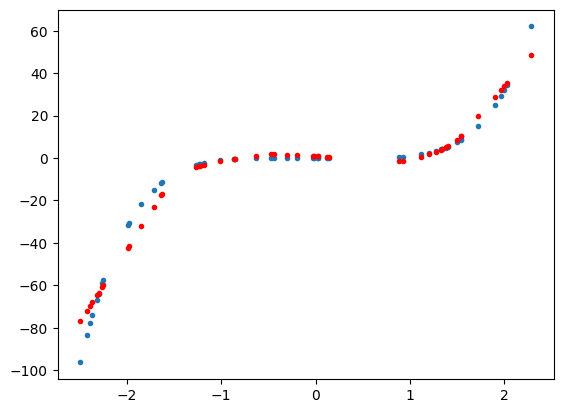

In [ ]:
# X ** 5

import random
import numpy as np
import matplotlib.pyplot as plt

# number of points
N = 50

X = np.zeros((N,1))
Y = np.zeros((N,1))

#length
L = 5

for i in range(N):
    X[i,0] = (np.random.rand() - 0.5) * L
    Y[i,0] = X[i] ** 5

mlp = MLPRegressor(hidden_layer_sizes=(20, 50), max_iter=1000)

mlp.fit(X, Y)

y_pred = mlp.predict(X)

fig, ax = plt.subplots()

ax.plot(X, Y, marker=".", linestyle="None")
ax.plot(X, y_pred, marker=".", linestyle="None", color="red")

plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


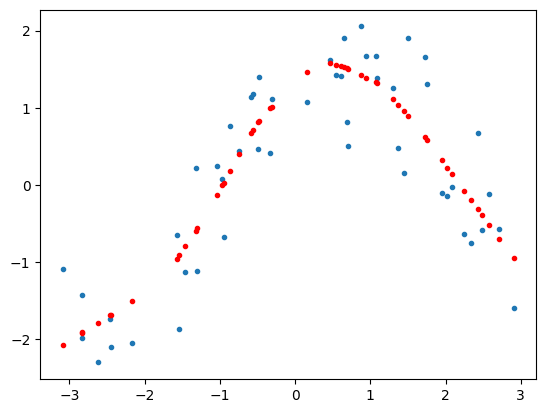

In [ ]:
# add noise

import random
import numpy as np
import matplotlib.pyplot as plt

# number of points
N = 50

X = np.zeros((N,1))
Y = np.zeros((N,1))

noise_power = 2

for i in range(N):
    X[i,0] = (np.random.rand() - 0.5) * 2 * np.pi
    Y[i,0] = np.sin(X[i]) + np.cos(X[i]) + (np.random.rand() - 0.5) * noise_power

mlp = MLPRegressor(hidden_layer_sizes=(20, 50), max_iter=1000)

mlp.fit(X, Y)

y_pred = mlp.predict(X)

fig, ax = plt.subplots()

ax.plot(X, Y, marker=".", linestyle="None")
ax.plot(X, y_pred, marker=".", linestyle="None", color="red")

plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


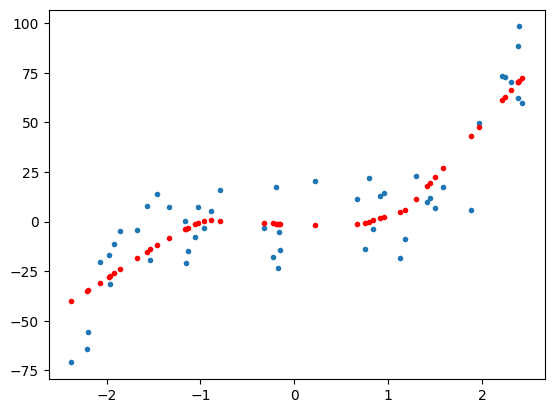

In [ ]:
# X ** 5
# add noise

import random
import numpy as np
import matplotlib.pyplot as plt

# number of points
N = 50

X = np.zeros((N,1))
Y = np.zeros((N,1))

noise_power = 50

for i in range(N):
    X[i,0] = (np.random.rand() - 0.5) * 5
    Y[i,0] = X[i] ** 5 + (np.random.rand() - 0.5) * noise_power

mlp = MLPRegressor(hidden_layer_sizes=(20, 50), max_iter=1000)

mlp.fit(X, Y)

y_pred = mlp.predict(X)

fig, ax = plt.subplots()

ax.plot(X, Y, marker=".", linestyle="None")
ax.plot(X, y_pred, marker=".", linestyle="None", color="red")

plt.show()

In [ ]:
# 3D function

import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Define the function
def f(x, y):
    return x * y

# Generate random data
X = np.random.uniform(low=-5, high=5, size=(100, 2))
y = f(X[:, 0], X[:, 1])

# Create an instance of the MLPRegressor class and set the desired hyperparameters
mlp = MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)

# Train the MLP on the data
mlp.fit(X, y)

# Generate data for the surface plot
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Make predictions with the trained MLP
Z_pred = mlp.predict(np.c_[X.ravel(), Y.ravel()]).reshape(X.shape)

# Calculate the mean squared error between the predicted and actual values
mse = mean_squared_error(Z.ravel(), Z_pred.ravel())
print(f'Mean Squared Error: {mse}')

# # Create a 3D surface plot of the actual and predicted values
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(X, Y, Z)
# ax.plot_surface(X, Y, Z_pred)
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')
# plt.show()

Mean Squared Error: 3.173785366200619


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


array([[-5.        , -5.        , -5.        , ..., -5.        ,
        -5.        , -5.        ],
       [-4.79591837, -4.79591837, -4.79591837, ..., -4.79591837,
        -4.79591837, -4.79591837],
       [-4.59183673, -4.59183673, -4.59183673, ..., -4.59183673,
        -4.59183673, -4.59183673],
       ...,
       [ 4.59183673,  4.59183673,  4.59183673, ...,  4.59183673,
         4.59183673,  4.59183673],
       [ 4.79591837,  4.79591837,  4.79591837, ...,  4.79591837,
         4.79591837,  4.79591837],
       [ 5.        ,  5.        ,  5.        , ...,  5.        ,
         5.        ,  5.        ]])

0.0025816968195021615


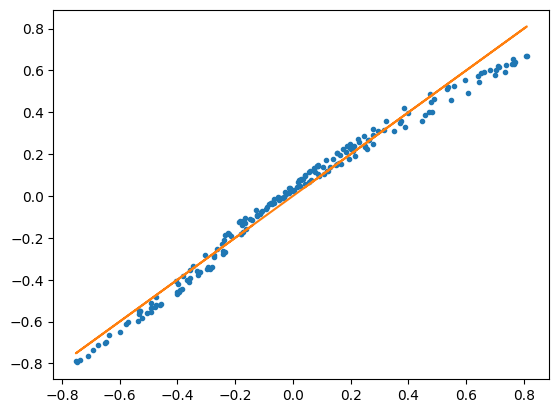

In [ ]:
N = 200

X = []
Z = []

for i in range(N):
  X.append((np.random.rand() - 0.5, np.random.rand() - 0.5))
  Z.append(np.sin(X[i][0] + X[i][1]))

X = np.array(X)
Z = np.array(Z)

mlp = MLPRegressor(hidden_layer_sizes=(30, 20), max_iter=1000)

mlp.fit(X, Z)

Z_predict = mlp.predict(X)

print(mean_squared_error(Z, Z_predict))

fig, axis = plt.subplots()

axis.plot(Z, Z_predict, linestyle="None", marker=".")
axis.plot(Z, Z)

fig.show()

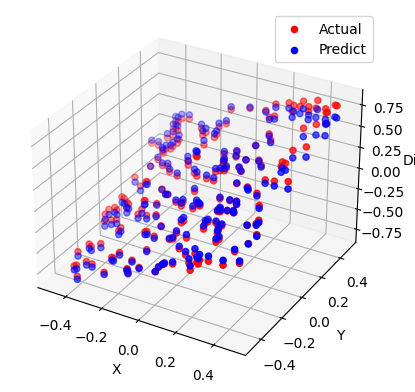

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], Z, color='red', label='Actual')
ax.scatter(X[:, 0], X[:, 1], Z_predict, color='blue', label='Predict')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Diff')

ax.legend()

plt.show()

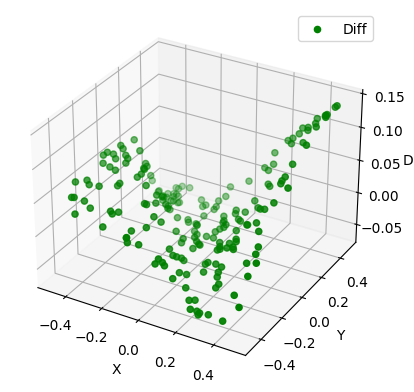

In [ ]:
adiff = Z - Z_predict

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], diff, color='green', label='Diff')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Diff')

ax.legend()

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean Squared Error: 1.4198337615749024


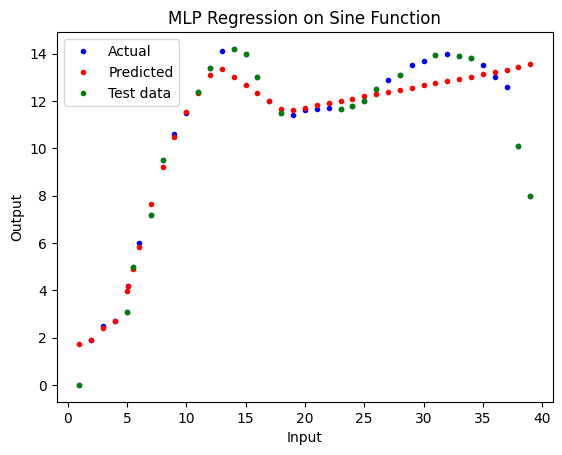

In [85]:
X = np.array([
    1, 2, 3, 4, 5, 5.1, 5.5, 6, 7, 8, 9, 10, 11, 12, 13,
    14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
    27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
]).reshape(-1, 1)

Y = np.array([
    0, 1.9, 2.5, 2.7, 3.1, 4.2, 5, 6, 7.2, 9.5, 10.6, 11.5,
    12.4, 13.4, 14.1, 14.2, 14, 13, 12, 11.5, 11.4, 11.6, 11.65,
    11.7, 11.67, 11.8, 12, 12.5, 12.9, 13.1, 13.5,
    13.7, 13.95, 14, 13.9, 13.8, 13.5, 13, 12.6, 10.1,
    8
]).reshape(-1, 1)


# X, y, hidden_layer_sizes, max_iter, random_state=42, test_size=0.5, noise=None
predict_function2(X, Y, (1024, 512, 256, 128), 200, test_size=0.5)

In [95]:
def interpolation(X, number_of_points):

  new_x = []
  for i in range(0, len(X)):
    if i + 1 == len(X):
      continue

    new_x.append(X[i])

    step = (X[i+1] - X[i]) / number_of_points
    temp = X[i]
    for j in range(number_of_points - 1):
      temp = temp + step
      new_x.append(temp)

    new_x.append(X[i+1])

  return np.array(new_x)

In [96]:
new_x = interpolation(X, 4)
new_y = interpolation(Y, 4)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 1.2114043294436547


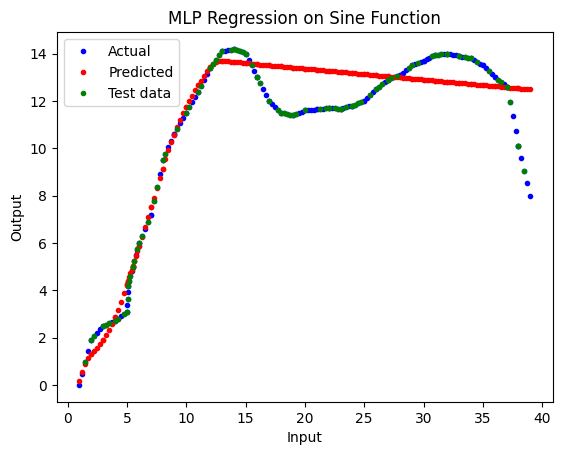

In [97]:
predict_function2(new_x, new_y, (1024, 512, 256, 128), 200, test_size=0.5)

In [98]:
new_x = interpolation(X, 200)
new_y = interpolation(Y, 200)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 0.13923878901154496


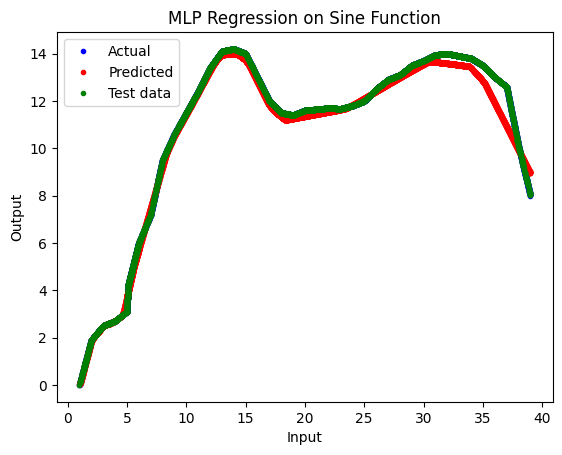

In [99]:
predict_function2(new_x, new_y, (1024, 512, 256, 128), 200, test_size=0.5)

In [ ]:
import cv2
import os

directory = 'images/train'

images = []

for filename in os.listdir(directory):
    img = cv2.imread(os.path.join(directory, filename))
    images.append(img)
